<a href="https://colab.research.google.com/github/PhuongHa159/Python-Global-Superstore-RFM-Analysis/blob/main/Python_Global%20Superstore%20RFM%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import files
uploaded = files.upload()

Saving ecommerce retail.xlsx to ecommerce retail (1).xlsx


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('ecommerce retail.xlsx')

In [18]:
df_raw = pd.DataFrame(df)
print(df_raw.info())
print(df_raw.describe())
# drop missing value in "CustomerID" by delete rows
df_raw= df_raw.dropna(subset=["CustomerID"])
# drop missing value in "Description" by delete columns
df_raw=df_raw.drop('Description',axis=1)
# Change datatype of UnitPrice
df_raw["UnitPrice"]=df_raw["UnitPrice"].astype(int)
# Change datatype of CustomerID
df_raw["CustomerID"]=df_raw["CustomerID"].astype(str)
# Handle outlier of Quantity and UnitPrice
df_raw=df_raw[(df_raw['Quantity'] > 0)]
df_raw=df_raw[(df_raw['UnitPrice'] > 0)]
print(df_raw.info())
print(df_raw.describe())
print(df_raw.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000   

In [19]:
df_trans=pd.DataFrame(df_raw, columns=['InvoiceNo', 'Quantity','InvoiceDate','UnitPrice','CustomerID'])
df_trans.head()
#Present date
present_date=df_trans["InvoiceDate"].max()
#Purchase price
df_trans['purchase_price']=df_trans['Quantity'] * df_trans['UnitPrice']

In [20]:
#Create RFM Table
RFM_data=df_trans.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (present_date - x.max()).days,
    'InvoiceNo' : 'count',
    'purchase_price':'sum'})
RFM_data.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency','purchase_price':'Monetary'}, inplace=True)
#Calculate RFMCore
RFM_data["Rscore"]=pd.qcut(RFM_data['Recency'],q=5,labels=[5,4,3,2,1])
RFM_data["Fscore"]=pd.qcut(RFM_data['Frequency'],q=5,labels=[1,2,3,4,5])
RFM_data["Mscore"]=pd.qcut(RFM_data['Monetary'],q=5,labels=[1,2,3,4,5])
RFM_data['RFMscore']=RFM_data["Rscore"].astype(str)+RFM_data["Fscore"].astype(str)+RFM_data["Mscore"].astype(str)
RFM_data = RFM_data.reset_index()
print(RFM_data.head())


  CustomerID  Recency  Frequency  Monetary Rscore Fscore Mscore RFMscore
0    12346.0      325          1     74215      1      1      5      115
1    12347.0        1        139      3012      5      5      5      555
2    12348.0       74         11       944      2      2      4      224
3    12349.0       18         64      1404      4      4      4      444
4    12350.0      309         14       244      1      2      2      122


In [21]:
from google.colab import files
uploaded = files.upload()

Saving Segment.xlsx to Segment (1).xlsx


In [22]:
df1=pd.read_excel('Segment.xlsx')
df_seg = pd.DataFrame(df1)
df_seg.rename(columns={'RFM Score': 'RFMscore'}, inplace=True)
print(df_seg)

                  Segment                                           RFMscore
0               Champions                  555, 554, 544, 545, 454, 455, 445
1                   Loyal             543, 444, 435, 355, 354, 345, 344, 335
2      Potential Loyalist  553, 551, 552, 541, 542, 533, 532, 531, 452, 4...
3           New Customers                  512, 511, 422, 421, 412, 411, 311
4               Promising  525, 524, 523, 522, 521, 515, 514, 513, 425,42...
5          Need Attention             535, 534, 443, 434, 343, 334, 325, 324
6          About To Sleep             331, 321, 312, 221, 213, 231, 241, 251
7                 At Risk  255, 254, 245, 244, 253, 252, 243, 242, 235, 2...
8        Cannot Lose Them               155, 154, 144, 214,215,115, 114, 113
9   Hibernating customers  332, 322, 233, 232, 223, 222, 132, 123, 122, 2...
10         Lost customers                         111, 112, 121, 131,141,151


In [23]:
# Convert 'RFMscore' to string type
df_seg['RFMscore'] = df_seg['RFMscore'].astype(str)

# Split the string by commas to create a list
df_seg['RFMscore'] = df_seg['RFMscore'].str.split(',')

# Strip leading and trailing spaces from each item in the list
df_seg['RFMscore'] = df_seg['RFMscore'].apply(lambda x: [i.strip() for i in x])

# Explode the list so each item in the list becomes a separate row
df_seg = df_seg.explode('RFMscore').reset_index(drop=True)

# Print the DataFrame
print(df_seg)

            Segment RFMscore
0         Champions      555
1         Champions      554
2         Champions      544
3         Champions      545
4         Champions      454
..              ...      ...
120  Lost customers      112
121  Lost customers      121
122  Lost customers      131
123  Lost customers      141
124  Lost customers      151

[125 rows x 2 columns]


In [24]:
RFM_table=pd.merge_ordered(RFM_data,df_seg,on='RFMscore',how='left')
print(RFM_table)

     CustomerID  Recency  Frequency  Monetary Rscore Fscore Mscore RFMscore  \
0       12353.0      203          4        74      1      1      1      111   
1       12361.0      286         10       117      1      1      1      111   
2       12401.0      302          5        76      1      1      1      111   
3       12441.0      366          8       110      1      1      1      111   
4       12509.0      283          4       130      1      1      1      111   
...         ...      ...        ...       ...    ...    ...    ...      ...   
4299    18223.0        4        245      4922      5      5      5      555   
4300    18225.0        2        227      4020      5      5      5      555   
4301    18229.0       11        161      5840      5      5      5      555   
4302    18245.0        6        110      1577      5      5      5      555   
4303    18272.0        2        133      2090      5      5      5      555   

             Segment  
0     Lost customers  
1    

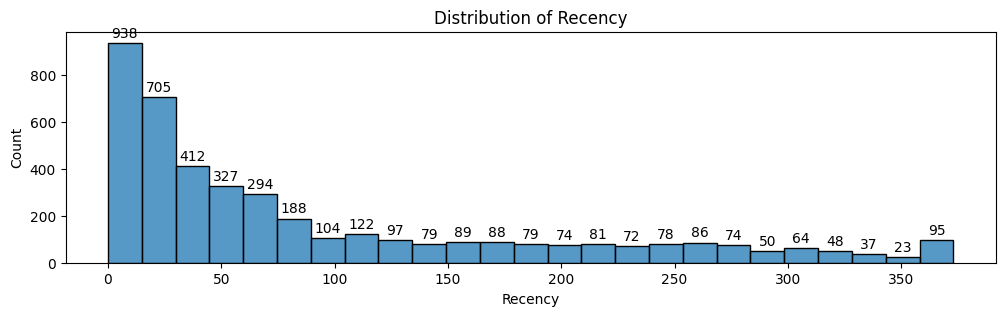

In [49]:
  # Distribution of Recency
fig,ax = plt.subplots(figsize=(12,3))
sns.histplot(RFM_table['Recency'])
ax.set_title('Distribution of Recency')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)
plt.show()

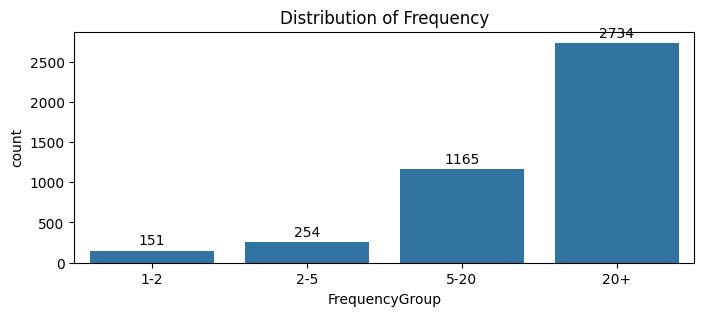

In [50]:
#Distribution of Frequency
binsF = [0, 2, 5, 20, np.inf]
labelsF = ['1-2', '2-5', '5-20', '20+']
RFM_table['FrequencyGroup'] = pd.cut(RFM_table['Frequency'], bins=binsF, labels=labelsF)
fig, ax = plt.subplots(figsize=(8, 3))
sns.countplot(x=RFM_table['FrequencyGroup'], ax=ax)
ax.set_title('Distribution of Frequency')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)
plt.show()

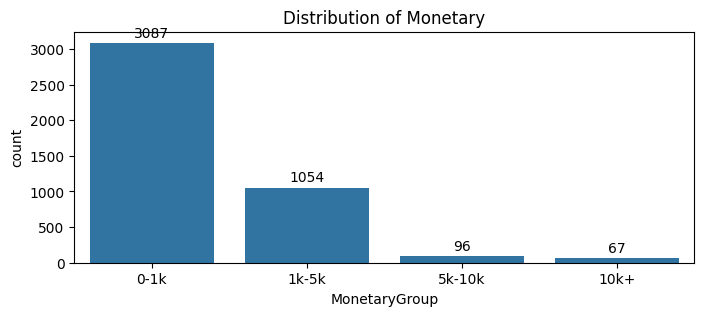

In [51]:
#Distribution of Monetary
binsF = [0,1000,5000,10000, np.inf]
labelsF = ['0-1k', '1k-5k', '5k-10k', '10k+']
RFM_table['MonetaryGroup'] = pd.cut(RFM_table['Monetary'], bins=binsF, labels=labelsF)
fig, ax = plt.subplots(figsize=(8, 3))
sns.countplot(x=RFM_table['MonetaryGroup'], ax=ax)
ax.set_title('Distribution of Monetary')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)
plt.show()

In [52]:
pip install squarify

In [27]:
grouped = RFM_table.groupby('Segment').agg(Cust_Count_seg=('CustomerID', 'count')).reset_index()
grouped['count_share'] = (grouped['Cust_Count_seg'] /RFM_table['CustomerID'].count())
print(grouped)

                  Segment  Cust_Count_seg  count_share
0          About To Sleep             184     0.042751
1                 At Risk             440     0.102230
2        Cannot Lose Them              97     0.022537
3               Champions             775     0.180065
4   Hibernating customers             802     0.186338
5          Lost customers             408     0.094796
6                   Loyal             413     0.095957
7          Need Attention             235     0.054600
8           New Customers             321     0.074582
9      Potential Loyalist             496     0.115242
10              Promising             133     0.030901


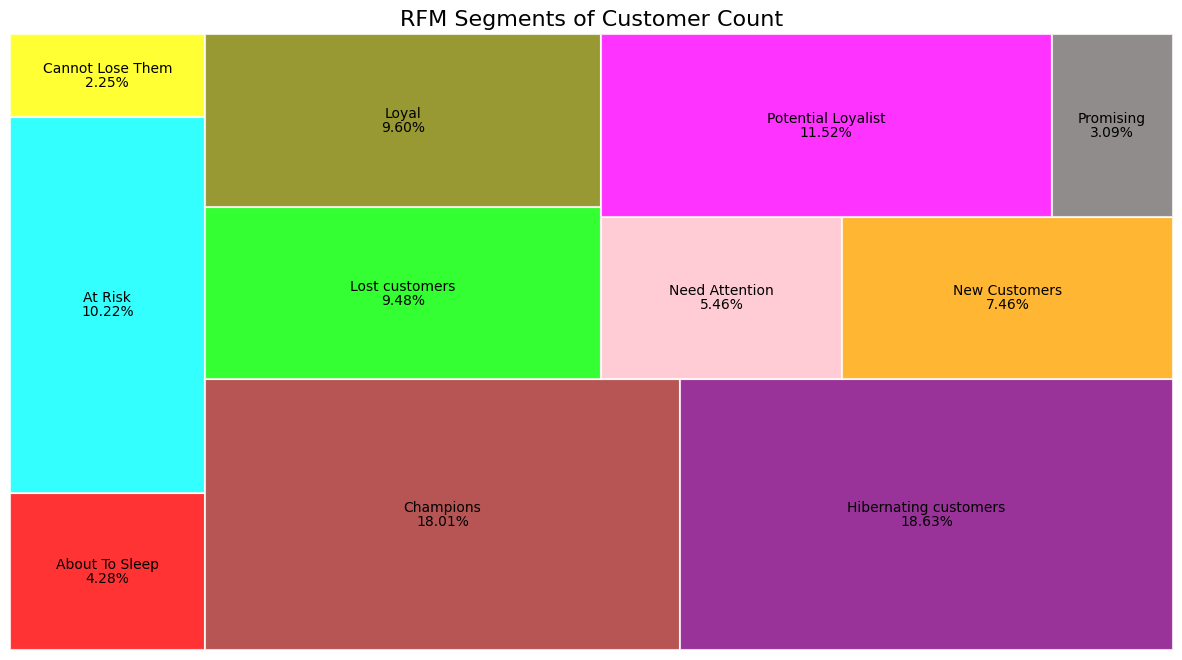

In [28]:
import squarify
import numpy as np
colors=['#FF0000',"#00FFFF","#FFFF00","#A52A2A","#800080","#00FF00","#808000","#FFC0CB","#FFA500","#FF00FF","#736F6E"]
fig, ax = plt.subplots(1,figsize=(15,8))
squarify.plot(sizes=grouped['Cust_Count_seg'],
              label=grouped['Segment'],
              value=[f'{x*100:.2f}%' for x in grouped['count_share']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5,edgecolor="white"))
plt.title('RFM Segments of Customer Count',fontsize=16)
plt.axis('off')
plt.show()

Customer Segment Analysis:

The Champion and Hibernating customer segments account for the highest proportion in the company.
1. Champion Customers (18.01%):

Insights:

The company has a notable group of loyal customers, contributing to a stable and sustainable revenue stream—a strong indicator of business performance.

Risks:

Over-reliance on this limited customer group poses significant risks. Any decline in this segment, due to market changes, competition, or other factors, could severely impact the company's revenue.

2. Hibernating Customers (18.63%):

Insights:

Hibernating customers make up the largest segment, suggesting that the company has lost touch with a substantial portion of previous buyers. This is a warning sign regarding the company’s ability to maintain long-term customer relationships.

Opportunities:

If the company can reconnect with this group, it has the potential to boost revenue and maximize long-term customer value.

Challenges:

This situation might highlight inefficiencies in the company’s strategies for customer retention and long-term engagement.
Overview:

If both the Champion and Hibernating customer groups represent a high proportion, it suggests that the business is focused on its current customer base but has yet to fully tap into the potential of dormant customers. Maintaining Champion customers while reactivating Hibernating customers can help the business achieve both stability and sustainable growth.

However, this scenario may also highlight an imbalance in customer acquisition efforts. If the company focuses exclusively on its existing customer segments, it risks neglecting opportunities to attract new customers, which are essential for long-term expansion and diversification.

Recommendations:

For Champions: Diversify the customer base to reduce dependency on this group while continuing to nurture loyalty.

For Hibernating Customers: Launch targeted reactivation campaigns and evaluate current retention strategies to identify gaps and improve customer engagement efforts.